In [1]:
!pip install openpyxl


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import config
import matplotlib.dates as dates
import sklearn.linear_model as linear_model
plt.rcParams.update({'font.size': 18})


In [3]:
# chem2017 = pd.read_excel('Eh pH fO2 BA1A 2017 recalc 2-21.xlsx')
# chem2017

In [4]:
# chem2018 = pd.read_excel('Eh pH fO2 BA1A 2018 recalc 2-21.xlsx')
# chem2018

In [5]:
# fig, ax = plt.subplots(figsize=(15, 5))

# chem2017.plot('DEPT[M]', 'PH', ax=ax)
# chem2018.plot('depth, m', 'pH', ax=ax)

In [6]:
# fig, ax = plt.subplots(figsize=(15, 5))

# chem2017.plot('DEPT[M]', 'log(fO2), bars', ax=ax)
# chem2018.plot('depth, m', 'log(fO2), bars', ax=ax)

In [7]:
# chem2017['DEPT[M]'].diff()

In [89]:

def import_catalog(file):
    df = pd.read_csv(file)
    df.sort_values(by='first_arrival', inplace=True)
    df['arrival_datetime'] = df.arrival_time.apply(dates.num2date)
    return df
    
# also need to remove a number of columns that are simply irrelevant to the analysis or untested for a shareable dataset.

df141 = import_catalog(file='141precision.csv')
df188 = import_catalog(file='188precision.csv')
df197 = import_catalog(file='197precision.csv')
df211 = import_catalog(file='211precision.csv')


columns_to_keep = ['id', 'depth', 'relative_depth',
        'first_hydrophone', 'second_hydrophone',
       'arrival_time', 'first_arrival', 'second_arrival', 'dt',
       'max_amp', 'cum_amp', 'arrival_datetime', 'origin_time']

df141 = df141[columns_to_keep].copy()
df188 = df188[columns_to_keep].copy()
df197 = df197[columns_to_keep].copy()
df211 = df211[columns_to_keep].copy()

df141.sort_values(by='arrival_datetime', inplace=True)
df188.sort_values(by='arrival_datetime', inplace=True)
df197.sort_values(by='arrival_datetime', inplace=True)
df211.sort_values(by='arrival_datetime', inplace=True)

# # removing the events with maximum amplitude <0.1 since they are false positives
df141 = df141[df141.max_amp > 0.4].copy()
df188 = df188[df188.max_amp > 0.4].copy()
df197 = df197[df197.max_amp > 0.4].copy()
df211 = df211[df211.max_amp > 0.4].copy()

df141.drop_duplicates(subset=['arrival_datetime',], inplace=True)
df188.drop_duplicates(subset=['arrival_datetime',], inplace=True)
df197.drop_duplicates(subset=['arrival_datetime',], inplace=True)
df211.drop_duplicates(subset=['arrival_datetime',], inplace=True)

# df141 = df141[df141.depth > 160].copy()
# df188 = df188[df188.depth > 160].copy()
# df197 = df197[df197.depth > 160].copy()
# df211 = df211[df211.depth > 160].copy()

# df141 = df141[df141.depth < 400].copy()
# df188 = df188[df188.depth < 400].copy()
# df197 = df197[df197.depth < 400].copy()
# df211 = df211[df211.depth < 400].copy()

In [100]:
df141[~df141.depth.between(160, 400)].shape[0]/df141.shape[0]

0.08719346049046321

In [99]:
df188[~df188.depth.between(160, 400)].shape[0]/df188.shape[0]

0.3141025641025641

In [101]:
df197[~df197.depth.between(160, 400)].shape[0]/df197.shape[0]

0.35462555066079293

In [103]:
df211[~df211.depth.between(160, 400)].shape[0]/df211.shape[0]

0.07142857142857142

In [104]:
df141.describe()

,id,depth,relative_depth,first_hydrophone,second_hydrophone,arrival_time,dt,max_amp,cum_amp
count,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000
mean,1124.914850,299.216877,56.403525,3.603542,3.538147,18037.341248,-0.042243,1.430446,66.534454
std,630.737276,126.559701,121.499868,0.988434,1.004714,0.012747,0.077022,1.182356,38.650449
min,6.000000,-316.500000,-486.500000,2.000000,2.000000,18037.318243,-0.428000,0.400552,17.821346
25%,570.750000,217.906250,22.750000,3.000000,3.000000,18037.327671,-0.035250,0.735909,42.938924
50%,1136.500000,305.625000,35.875000,4.000000,4.000000,18037.343557,-0.020000,1.073247,56.940759
75%,1655.500000,345.875000,59.500000,4.000000,4.000000,18037.352305,-0.009000,1.717640,76.603274
max,2240.000000,1092.250000,922.250000,5.000000,5.000000,18037.359599,0.000000,15.617982,324.464846


In [105]:
df188.describe()

,id,depth,relative_depth,first_hydrophone,second_hydrophone,arrival_time,dt,max_amp,cum_amp
count,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000,1404.000000
mean,1546.706553,302.415421,80.663284,3.377493,3.251425,18084.393925,-0.110692,1.149733,62.443344
std,855.910244,223.103638,227.519267,0.972145,1.001157,0.011128,0.131401,0.865307,28.361196
min,3.000000,-805.625000,-975.625000,2.000000,2.000000,18084.365569,-0.477000,0.400080,15.532961
25%,783.750000,221.406250,8.750000,3.000000,2.000000,18084.386582,-0.299000,0.583940,43.026525
50%,1648.000000,290.750000,39.375000,3.000000,3.000000,18084.393919,-0.034000,0.858438,56.177863
75%,2274.500000,366.875000,69.999344,4.000000,4.000000,18084.401283,-0.019000,1.384493,74.050700
max,2880.000000,1113.250000,943.250000,5.000000,5.000000,18084.417749,0.000000,9.732573,218.102540


In [106]:
df197.describe()

,id,depth,relative_depth,first_hydrophone,second_hydrophone,arrival_time,dt,max_amp,cum_amp
count,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000
mean,507.929515,100.218631,-119.120577,3.180617,3.711454,18093.959545,-0.122683,0.922178,50.898944
std,303.633797,351.563669,347.751907,0.950415,1.153936,0.015579,0.136191,0.740468,19.703175
min,0.000000,-826.622375,-996.622375,2.000000,2.000000,18093.916507,-0.428999,0.400242,15.269054
25%,241.000000,-248.248250,-488.248250,2.000000,3.000000,18093.950793,-0.298999,0.526178,37.283134
50%,516.500000,214.187500,15.750000,3.000000,4.000000,18093.958517,-0.035500,0.715267,47.552308
75%,778.250000,280.250000,47.906469,4.000000,5.000000,18093.968977,-0.019000,1.022854,59.275786
max,1053.000000,1105.377625,935.377625,5.000000,5.000000,18093.993147,0.000000,8.773850,134.441032


In [107]:
df211.describe()

,id,depth,relative_depth,first_hydrophone,second_hydrophone,arrival_time,dt,max_amp,cum_amp
count,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000
mean,156.517857,260.992184,37.242184,3.308036,3.321429,18107.951813,-0.028009,3.328347,103.047726
std,83.264663,81.683576,56.536671,1.036866,0.880423,0.003891,0.042342,2.812438,75.137996
min,1.000000,-68.000000,-238.000000,2.000000,2.000000,18107.940825,-0.312000,0.400949,20.511069
25%,88.750000,203.687500,18.375000,2.000000,3.000000,18107.948811,-0.032250,1.403332,50.266454
50%,156.000000,263.187500,35.000000,3.000000,3.000000,18107.952147,-0.019500,2.477872,79.812589
75%,225.250000,309.125000,54.250000,4.000000,4.000000,18107.954556,-0.009000,4.498518,129.917786
max,321.000000,572.500000,402.500000,5.000000,5.000000,18107.959008,0.000000,14.438993,483.537635


In [108]:
def plot_events(data, ax):
    x = data['arrival_datetime'].diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum().values
    y = data['depth'].values
    s = data['max_amp'].values
    print('amplitude:',s.max())
    print(x.max())
    # ax.scatter(x/x.max(), y, s=s*10, alpha=0.3, c=plt.cm.twilight(0.4))
    # ax.scatter(x, y, s=s*10, alpha=0.3, c=plt.cm.twilight(0.4))
    ax.scatter(x, y, s=s*10, alpha=0.3, c='purple')
    return x.max()


def plot_hydrophone_depth_horizontal_line(hid, ax):
    hids = ['h1', 'h2', 'h3', 'h4', 'h5', 'h6']
    for hid in hids:
        depth = config.hydrophone_metadata_141[hid]['depth']
        ax.hlines(y=depth, xmin=-70000, xmax=700000, linestyle='--', color='black', alpha=0.25, zorder=0)

amplitude: 15.617981986417888
3573.1459999999915
amplitude: 9.732572922292873
4508.3620000000055
amplitude: 8.773849871513404
6621.756998999998
amplitude: 14.438993157294162
919.4599999999997


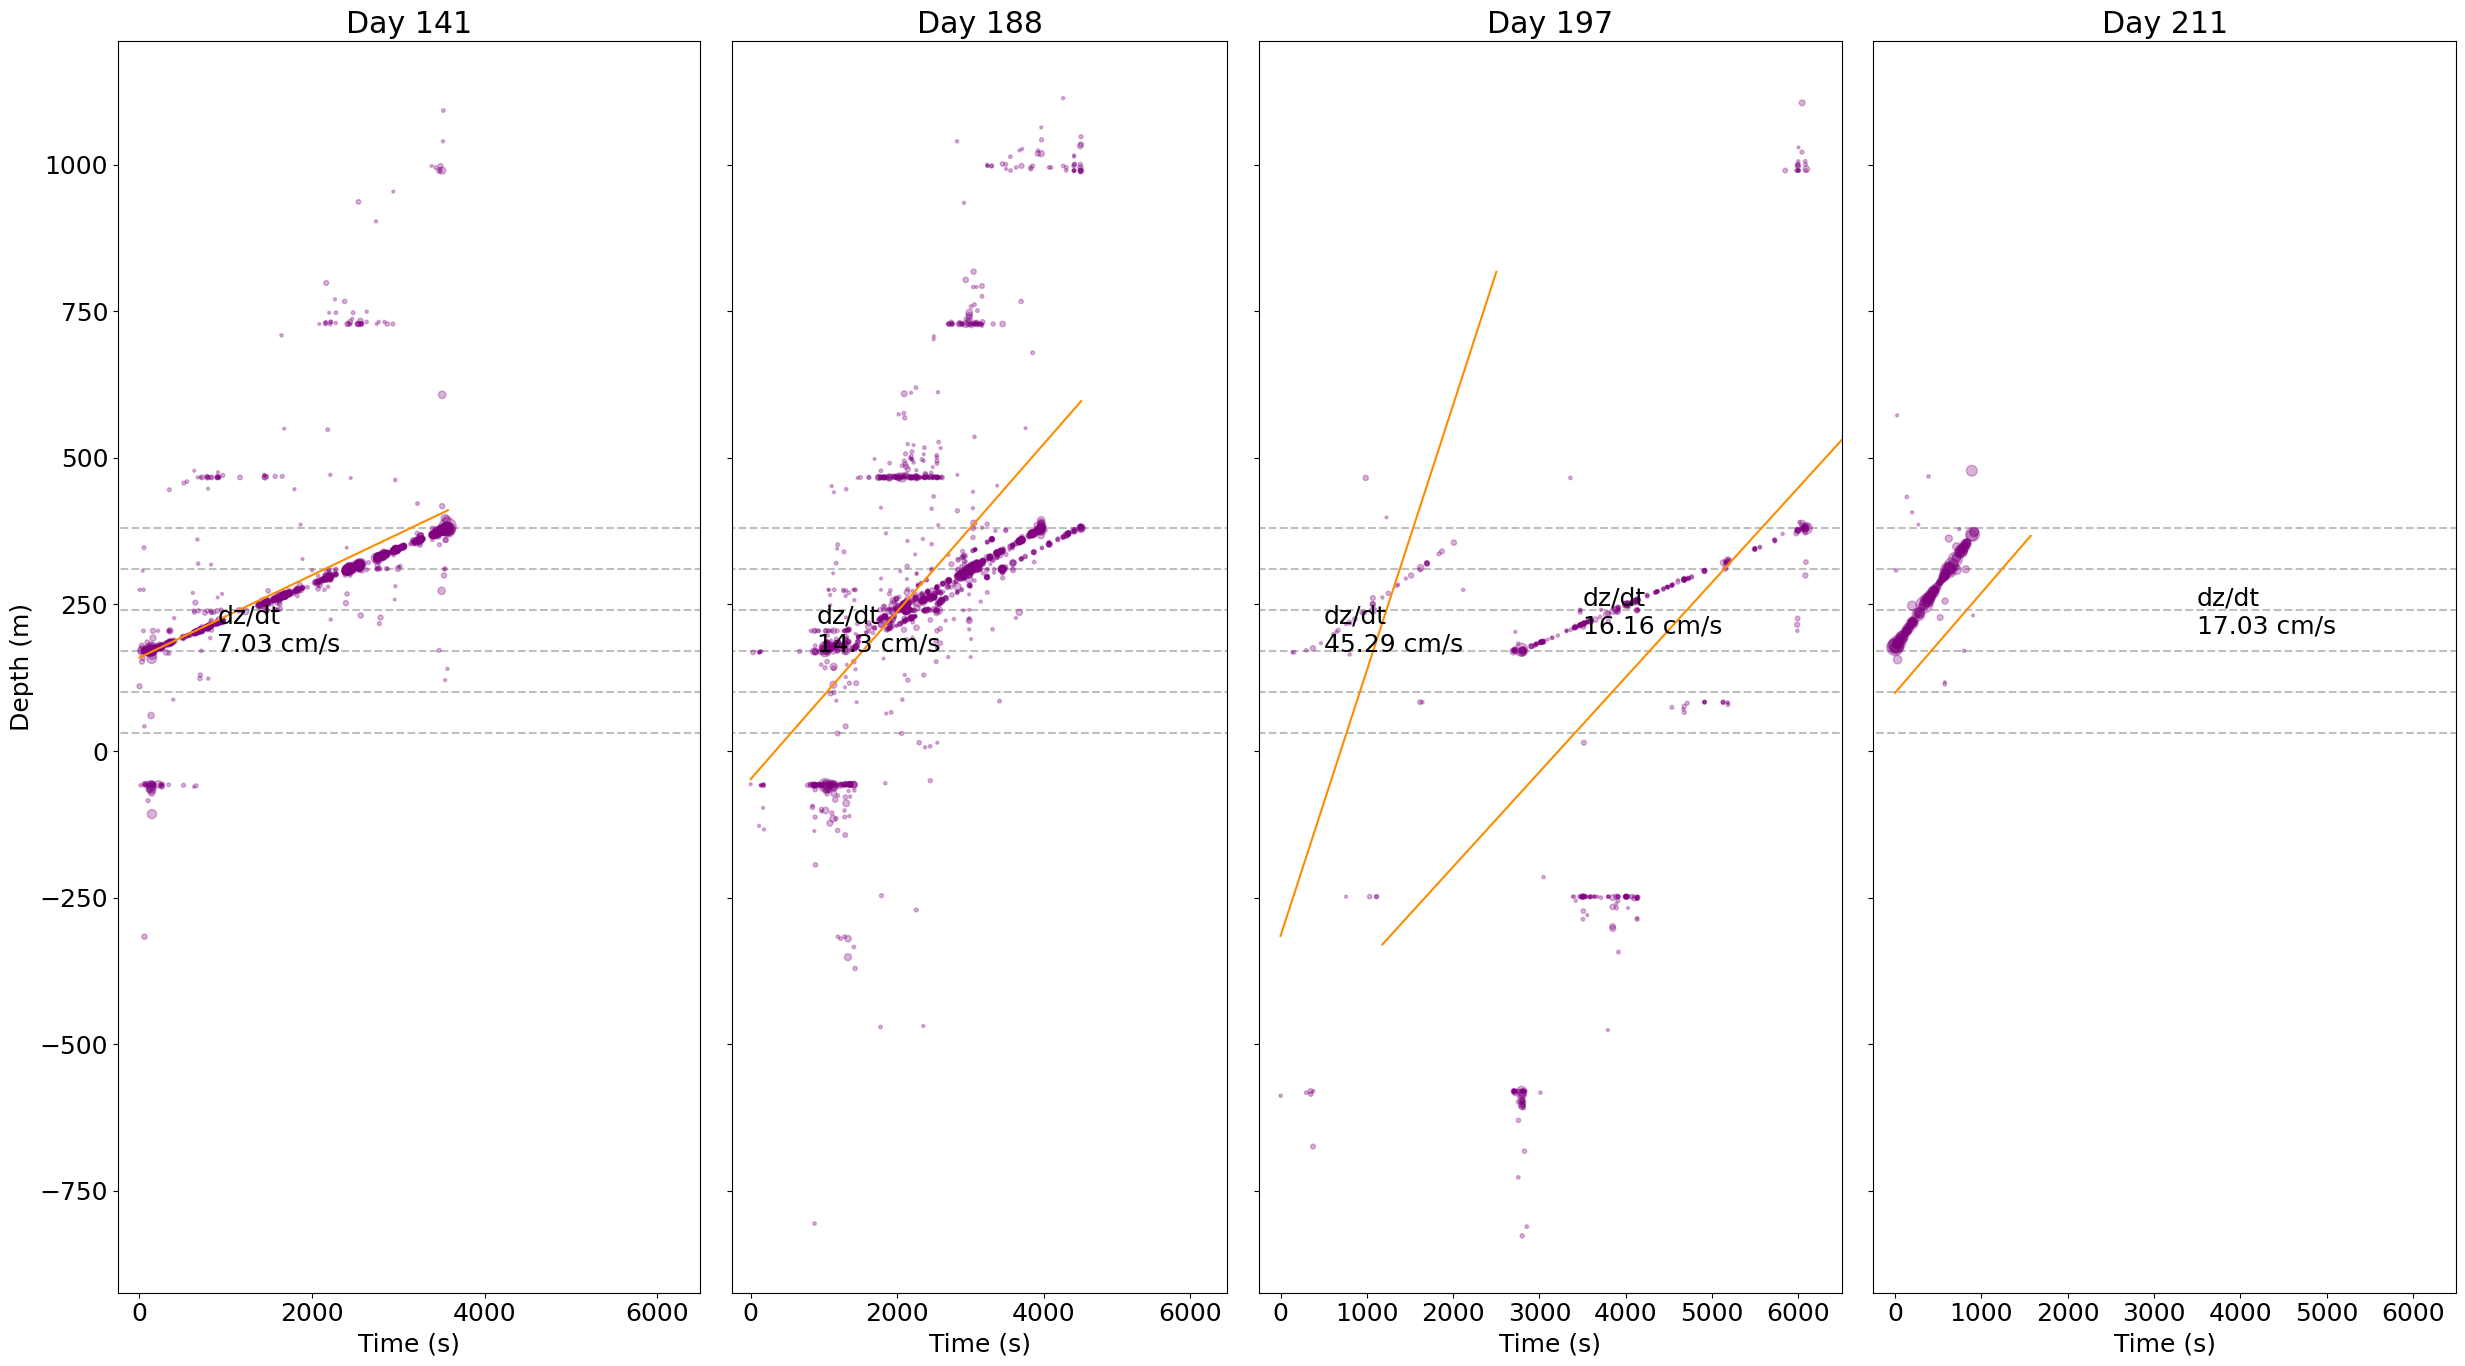

In [115]:
fig = plt.figure(figsize=(25, 14))
mosaic = fig.subplot_mosaic('''
                            bbbbbbbccccccdddddddeeeeeee
                            bbbbbbbccccccdddddddeeeeeee
                            bbbbbbbccccccdddddddeeeeeee
                            bbbbbbbccccccdddddddeeeeeee
                            '''
                           ,sharey=True)
fig.subplots_adjust(wspace=0)

# mosaic['b'].set_ylim(400, 150)
mosaic['b'].set_xticks([])
mosaic['b'].set_ylabel('Depth (m)')

for ax in 'bcde':
    mosaic[ax].set_xlim(-250, 6500)
    mosaic[ax].set_xlabel('Time (s)')

# mosaic['e'].scatter(() , (), s=[50*10,], alpha=0.3, color=plt.cm.twilight(0.4), label='\n Amplitude=50Pa \n')
# mosaic['e'].scatter(() , (), s=[150*10,], alpha=0.3, color=plt.cm.twilight(0.4), label='\n Amplitude=150Pa \n')
# mosaic['e'].scatter(() , (), s=[350*10,], alpha=0.3, color=plt.cm.twilight(0.4), label='\n Amplitude=350Pa \n')
# # mosaic['e'].scatter(() , (), s=[550*10,], alpha=0.3, color=plt.cm.twilight(0.4), label='\n Amplitude=550Pa \n')
# mosaic['e'].legend(edgecolor='None', loc='lower right', fontsize=15)

plot_hydrophone_depth_horizontal_line(hid='h3', ax=mosaic['b'])
plot_hydrophone_depth_horizontal_line(hid='h4', ax=mosaic['c'])
plot_hydrophone_depth_horizontal_line(hid='h5', ax=mosaic['d'])
plot_hydrophone_depth_horizontal_line(hid='h6', ax=mosaic['e'])

mosaic['b'].set_title('Day 141')
mosaic['c'].set_title('Day 188')
mosaic['d'].set_title('Day 197')
mosaic['e'].set_title('Day 211')

##############
# PLOT DATA HERE
#############

# mosaic['a'].pcolormesh(xx, yy, Z[:-1], vmin=0, vmax=6, cmap='PRGn', shading='auto')

x141 = plot_events(data=df141, ax=mosaic['b'])
x188 = plot_events(data=df188, ax=mosaic['c'])
x197 = plot_events(data=df197, ax=mosaic['d'])
x211 = plot_events(data=df211[20:-10], ax=mosaic['e'])

def fitline(data, ax):
    # x = data['arrival_datetime'].diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum().values.reshape(-1, 1)
    x = data['arrival_datetime'].diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum().values.reshape(-1, 1)
    y = data['depth'].values.reshape(-1, 1)
    lr = linear_model.LinearRegression()
    lr.fit(x, y)
    modx = np.linspace(0, x.max(), 1000)
    mody = lr.intercept_[0] + lr.coef_[0] * modx
    
    ax.plot(modx, mody, color='darkorange')
    ax.text(s=f'dz/dt\n{np.round(lr.coef_[0][0]*100, 2)} cm/s'
            , x=900, y=170
           ,fontsize=18)

fitline(df141, ax=mosaic['b'])
fitline(df188, ax=mosaic['c'])
# fitline(df211, ax=mosaic['e'])

# 197 fitline 1
data = df197[:30].copy()
x = data['arrival_datetime'].diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum().values.reshape(-1, 1)
y = data['depth'].values.reshape(-1, 1)
lr = linear_model.LinearRegression()
lr.fit(x, y)
xmod = np.linspace(0, 2500, 1000)
ymod = lr.intercept_ + lr.coef_[0] * xmod
mosaic['d'].plot(xmod, ymod, color='darkorange')
mosaic['d'].text(s=f'dz/dt\n{np.round(lr.coef_[0][0]*100, 2)} cm/s'
                 ,x=500, y=170
                 ,fontsize=18)
xstop = x.max()

# 197 fitline 2
data = df197[30:].copy()
x = data['arrival_datetime'].diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum().values.reshape(-1, 1)
y = data['depth'].values.reshape(-1, 1)
lr = linear_model.LinearRegression()
lr.fit(x, y)
xmod = np.linspace(xstop, 7000, 1000)
ymod = lr.intercept_ + lr.coef_[0] * (xmod - xstop)
mosaic['d'].plot(xmod, ymod, color='darkorange')
mosaic['d'].text(s=f'dz/dt\n{np.round(lr.coef_[0][0]*100, 2)} cm/s'
                 ,x=3500, y=200
                 ,fontsize=18)

# 211 fitline
data = df211.copy()
x = data['arrival_datetime'].diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum().values.reshape(-1, 1)
y = data['depth'].values.reshape(-1, 1)
lr = linear_model.LinearRegression()
lr.fit(x, y)
xmod = np.linspace(0, x.max(), 1000)
ymod = lr.intercept_ + lr.coef_[0] * (xmod)
mosaic['e'].plot(xmod, ymod, color='darkorange')
mosaic['e'].text(s=f'dz/dt\n{np.round(lr.coef_[0][0]*100, 2)} cm/s'
                 ,x=3500, y=200
                 ,fontsize=18)

mosaic['b'].set_xticks(np.arange(0, 6001, 2000))
# mosaic['b'].set_xlim(-50, 4500)

fig.tight_layout()
fig.savefig('fig4.pdf', bbox_inches='tight')

In [110]:
df141[df141.depth>400]

,id,depth,relative_depth,first_hydrophone,second_hydrophone,arrival_time,first_arrival,second_arrival,dt,max_amp,cum_amp,arrival_datetime,origin_time
205,205,445.625,275.625,3,2,18037.322257,2019-05-21 07:44:03.044000+00:00,2019-05-21 07:44:03.319000+00:00,-0.275,0.805607,45.095910,2019-05-21 07:44:03.044000+00:00,2019-05-21T07:44:02.886500Z
281,281,457.000,287.000,3,2,18037.324192,2019-05-21 07:46:50.201000+00:00,2019-05-21 07:46:50.489000+00:00,-0.288,0.754152,42.176260,2019-05-21 07:46:50.201000+00:00,2019-05-21T07:46:50.037000Z
287,287,459.625,289.625,3,2,18037.324605,2019-05-21 07:47:25.838000+00:00,2019-05-21 07:47:26.129000+00:00,-0.291,0.628053,33.963768,2019-05-21 07:47:25.838000+00:00,2019-05-21T07:47:25.672500Z
315,315,478.000,308.000,4,2,18037.325588,2019-05-21 07:48:50.829000+00:00,2019-05-21 07:48:50.985000+00:00,-0.156,0.451782,23.151696,2019-05-21 07:48:50.829000+00:00,2019-05-21T07:48:50.653000Z
378,378,466.625,296.625,3,2,18037.326055,2019-05-21 07:49:31.176000+00:00,2019-05-21 07:49:31.475000+00:00,-0.299,0.454456,39.906892,2019-05-21 07:49:31.176000+00:00,2019-05-21T07:49:31.006500Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,2123,417.625,107.625,5,4,18037.358825,2019-05-21 08:36:42.480000+00:00,2019-05-21 08:36:42.563000+00:00,-0.083,1.397417,58.517488,2019-05-21 08:36:42.480000+00:00,2019-05-21T08:36:42.418500Z
2125,2125,607.500,297.500,5,4,18037.358835,2019-05-21 08:36:43.347000+00:00,2019-05-21 08:36:43.647000+00:00,-0.300,2.865815,114.404533,2019-05-21 08:36:43.347000+00:00,2019-05-21T08:36:43.177000Z
2127,2127,989.875,819.875,5,2,18037.358845,2019-05-21 08:36:44.191000+00:00,2019-05-21 08:36:44.490000+00:00,-0.299,2.482326,94.484965,2019-05-21 08:36:44.191000+00:00,2019-05-21T08:36:43.722500Z
2145,2145,1039.750,869.750,5,2,18037.358946,2019-05-21 08:36:52.934000+00:00,2019-05-21 08:36:53.252000+00:00,-0.318,0.512222,56.686115,2019-05-21 08:36:52.934000+00:00,2019-05-21T08:36:52.437000Z


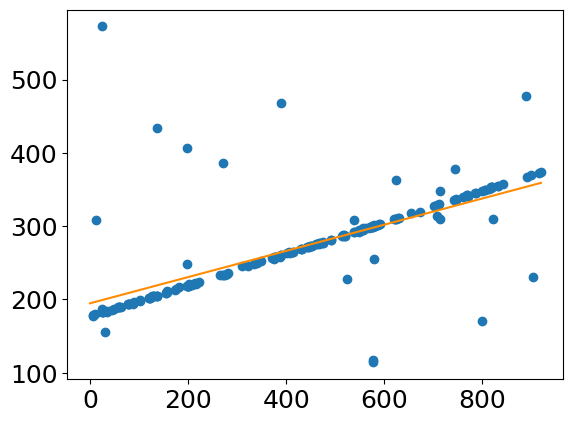

In [111]:
fig, ax = plt.subplots()

data = df211[20:-10].copy()

ax.scatter(data['arrival_datetime'].diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum().values.reshape(-1, 1)[2:]
        ,data['depth'][2:]
          )

x = data['arrival_datetime'].diff().apply(lambda t: t.total_seconds()).fillna(0).cumsum().values.reshape(-1, 1)
y = data['depth'].values.reshape(-1, 1)
lr = linear_model.LinearRegression()
lr.fit(x, y)
# xmod = np.linspace(xstop, 7000, 1000)
modx = np.linspace(0, x.max(), 1000)
ymod = lr.intercept_ + lr.coef_[0] * (modx)
ax.plot(modx, ymod, color='darkorange')
# ax.text(s=f'dz/dt\n{np.round(lr.coef_[0][0]*100, 2)} cm/s'
#                  ,x=3500, y=200
#                  ,fontsize=18)

In [112]:
df211

,id,depth,relative_depth,first_hydrophone,second_hydrophone,arrival_time,first_arrival,second_arrival,dt,max_amp,cum_amp,arrival_datetime,origin_time
1,1,149.00,-21.00,2,3,18107.940825,2019-07-30 22:34:47.270999+00:00,2019-07-30 22:34:47.334999+00:00,-0.064,0.631304,38.669211,2019-07-30 22:34:47.270999+00:00,2019-07-30T22:34:47.282999Z
3,3,450.00,140.00,5,4,18107.940843,2019-07-30 22:34:48.828999+00:00,2019-07-30 22:34:48.948999+00:00,-0.120,0.437812,36.985012,2019-07-30 22:34:48.828999+00:00,2019-07-30T22:34:48.748999Z
5,5,170.00,0.00,2,3,18107.941234,2019-07-30 22:35:22.659999+00:00,2019-07-30 22:35:22.699999+00:00,-0.040,0.952204,35.500934,2019-07-30 22:35:22.659999+00:00,2019-07-30T22:35:22.659999Z
7,7,-68.00,-238.00,2,3,18107.942173,2019-07-30 22:36:43.743999+00:00,2019-07-30 22:36:44.055999+00:00,-0.312,0.549713,49.426019,2019-07-30 22:36:43.743999+00:00,2019-07-30T22:36:43.879999Z
8,8,-59.25,-229.25,2,3,18107.942301,2019-07-30 22:36:54.776999+00:00,2019-07-30 22:36:55.078999+00:00,-0.302,0.470436,29.468635,2019-07-30 22:36:54.776999+00:00,2019-07-30T22:36:54.907999Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,303,387.00,77.00,5,4,18107.958307,2019-07-30 22:59:57.714999+00:00,2019-07-30 22:59:57.762999+00:00,-0.048,0.765061,47.892116,2019-07-30 22:59:57.714999+00:00,2019-07-30T22:59:57.670999Z
316,316,383.50,73.50,5,4,18107.958986,2019-07-30 23:00:56.367999+00:00,2019-07-30 23:00:56.411999+00:00,-0.044,1.096863,60.496911,2019-07-30 23:00:56.367999+00:00,2019-07-30T23:00:56.325999Z
318,318,257.50,87.50,5,2,18107.958991,2019-07-30 23:00:56.845999+00:00,2019-07-30 23:00:56.865999+00:00,-0.020,0.588272,57.875979,2019-07-30 23:00:56.845998+00:00,2019-07-30T23:00:56.795999Z
319,319,383.50,73.50,5,4,18107.958998,2019-07-30 23:00:57.433999+00:00,2019-07-30 23:00:57.477999+00:00,-0.044,1.836913,75.374782,2019-07-30 23:00:57.433999+00:00,2019-07-30T23:00:57.391999Z


r2:0.3740055560980401
velocity:0.07027676031502834
r2:0.37961589574693433
velocity:0.14296752412554178
r2:0.3138438066507597
velocity:0.35751770423799784
r2:0.36115716482360416
velocity:0.20619252543777117
r2:0.47603470784375834
velocity:0.16685669660993593


(90.0, 410.0)

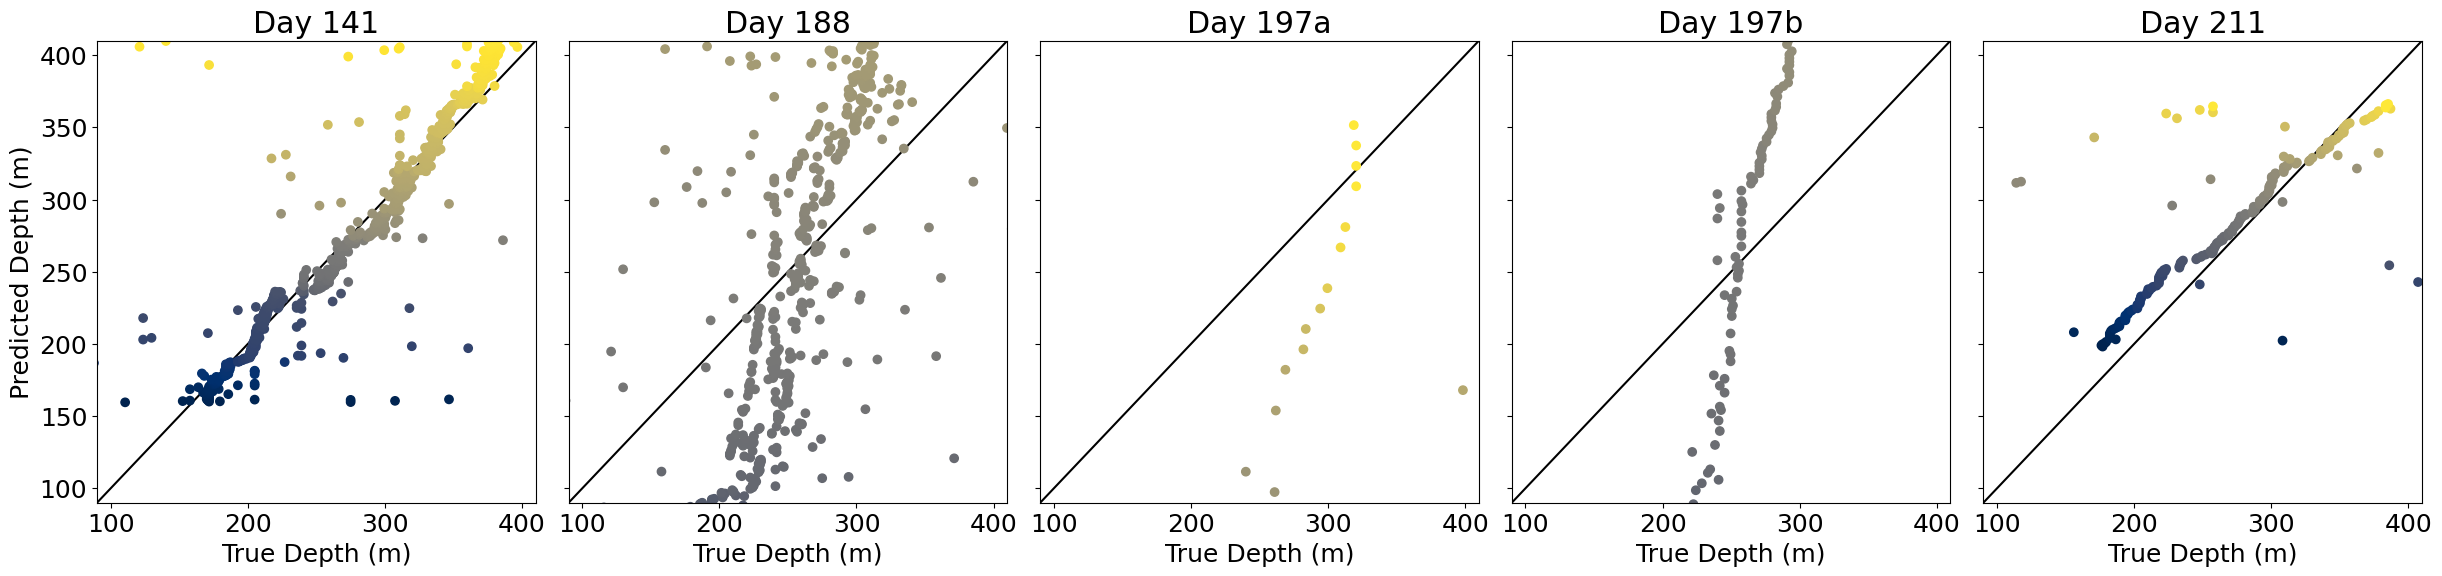

In [113]:
AMPS = []
VELS = []

fig = plt.figure(figsize=(30, 6))
mosaic = fig.subplot_mosaic('''
                            abcde
                            '''
                           ,sharey=True
                           ,sharex=True)
fig.subplots_adjust(wspace=0.075)

def plot_residuals(data, ax, **kwargs):
    data = data.copy()
    x = data['arrival_datetime'].diff()
    x = x.apply(lambda t: t.total_seconds())
    x = x.fillna(0).cumsum().values.reshape(-1, 1)
    y = data['depth'].values
    lr = linear_model.LinearRegression()
    lr.fit(x, y)
    print(f'r2:{lr.score(x, y)}')
    
    xmod = np.linspace(0, x.flatten().max(), x.flatten().shape[0])
    ymod = lr.intercept_ + lr.coef_[0] * xmod
    print(f'velocity:{lr.coef_[0]}')
    VELS.append(lr.coef_[0])

    cbar = ax.scatter(y, ymod, c=x, cmap='cividis')
    ax.plot((0, 500), (0, 500), color='black', zorder=0)
    return xmod, ymod

xymod141 = plot_residuals(data=df141, ax=mosaic['a'])
xymod188 = plot_residuals(data=df188, ax=mosaic['b'])
xymod197a = plot_residuals(data=df197[:44], ax=mosaic['c'])
xymod197b = plot_residuals(data=df197[44:], ax=mosaic['d'])
xymod211 = plot_residuals(data=df211[20:], ax=mosaic['e'])

mosaic['a'].set_ylabel('Predicted Depth (m)')
mosaic['a'].set_xlabel('True Depth (m)')
mosaic['b'].set_xlabel('True Depth (m)')
mosaic['c'].set_xlabel('True Depth (m)')
mosaic['d'].set_xlabel('True Depth (m)')
mosaic['e'].set_xlabel('True Depth (m)')
mosaic['a'].set_title('Day 141')
mosaic['b'].set_title('Day 188')
mosaic['c'].set_title('Day 197a')
mosaic['d'].set_title('Day 197b')
mosaic['e'].set_title('Day 211')
mosaic['a'].set_ylim(90, 410)
mosaic['a'].set_xlim(90, 410)
# plt.tight_layout()
# fig.savefig('fig5.pdf', bbox_inches='tight')

In [27]:
import obspy
df141.origin_time.apply(obspy.UTCDateTime).apply(lambda t: t.datetime)

8      2019-05-21 07:38:17.744000
14     2019-05-21 07:38:42.922000
16     2019-05-21 07:38:43.766500
20     2019-05-21 07:38:53.776500
26     2019-05-21 07:38:57.606500
                  ...            
2234   2019-05-21 08:37:45.145500
2236   2019-05-21 08:37:46.245500
2237   2019-05-21 08:37:46.851500
2239   2019-05-21 08:37:48.472500
2240   2019-05-21 08:37:49.325500
Name: origin_time, Length: 1426, dtype: datetime64[ns]

In [28]:
df141.origin_time.apply(obspy.UTCDateTime).apply(lambda t: t.datetime).diff().apply(lambda t: t.total_seconds())

8           NaN
14      25.1780
16       0.8445
20      10.0100
26       3.8300
         ...   
2234     2.2100
2236     1.1000
2237     0.6060
2239     1.6210
2240     0.8530
Name: origin_time, Length: 1426, dtype: float64

In [29]:
'''
For each catalog with N events, each (i-th) event is characterized by a source depth, zi, and origin time, ti (and amplitude but we won't use that here).
Code up the following where vi = instantaneous velocity at event time ti.

NOTE: remember that Rob uses matlab which is indexed from 1

zmax=z1
tmax=t1
for i = 2:N
  if zi > zmax
    vi = (zi- zmax)/(ti - tmax)
    zmax=zi
    tmax=ti
  end
end
'''

"\nFor each catalog with N events, each (i-th) event is characterized by a source depth, zi, and origin time, ti (and amplitude but we won't use that here).\nCode up the following where vi = instantaneous velocity at event time ti.\n\nNOTE: remember that Rob uses matlab which is indexed from 1\n\nzmax=z1\ntmax=t1\nfor i = 2:N\n  if zi > zmax\n    vi = (zi- zmax)/(ti - tmax)\n    zmax=zi\n    tmax=ti\n  end\nend\n"

In [30]:
# data = df188.copy()

# z = data.depth.values
# t = pd.to_datetime(data.origin_time.values)

# zmax = z[0]
# tmax = t[0]

# v_inst = []
# t_inst = []
# d_inst = []

# for i in np.arange(1, z.shape[0], 1):
#     if z[i] > zmax:
#         dz = z[i] - zmax
#         dt = (t[i] - tmax).total_seconds()
#         vi = dz/dt
#         v_inst.append(vi)
#         t_inst.append(dt)
#         d_inst.append(z[i])
        



In [31]:
# fig, ax = plt.subplots(figsize=(15, 5))
# ax.plot(t_inst, v_inst, marker='x')
# # ax.plot(np.cumsum(t_inst), v_inst)
# # ax.set_ylim(0.04, 0.07)
# ax.set_ylabel('instananeous velocity cm/s')

In [32]:
# fig, ax = plt.subplots(figsize=(9, 8))
# ax.scatter(v_inst, d_inst)
# ax.set_xlim(0.0, 0.1)
# ax.set_ylim(400, 150)

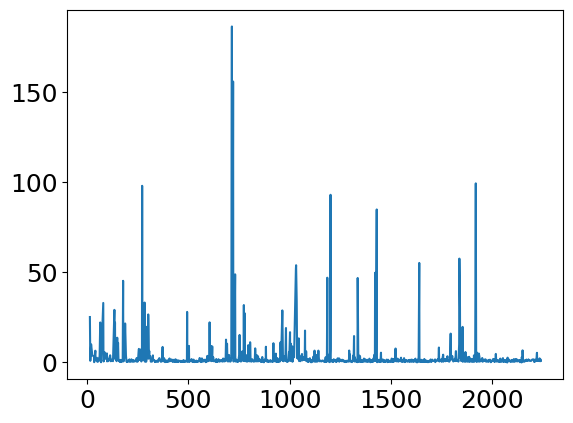

In [33]:
t = df141.origin_time.apply(obspy.UTCDateTime).apply(lambda t: t.datetime).diff().apply(lambda t: t.total_seconds())

plt.plot(t, )

In [34]:
# # data = df188.copy()
# datas = [df141, df188, df197, df211]
# day = ['141', '188', '197', '211']
# colors = ['dodgerblue', 'darkorange', 'purple', 'limegreen']
# fig, ax = plt.subplots(figsize=(9, 8))

# c = 0
# for data in datas:
    
#     z = data.depth.values
#     t = pd.to_datetime(data.origin_time.values)
    
#     zmax = z[0]
#     tmax = t[0]
    
#     v_inst = []
#     t_inst = []
#     d_inst = []
    
#     for i in np.arange(1, z.shape[0], 1):
#         if z[i] > zmax:
#             # dz = z[i] - zmax
#             dz = zmax - z[i]
#             dt = (t[i] - tmax).total_seconds()
#             # vi = (z[i] - zmax)/(t[i] - tmax).total_seconds()
#             vi = dz/dt
#             v_inst.append(vi)
#             # t_inst.append(t[i])
#             t_inst.append(dt)
#             d_inst.append(z[i])
#             zmax = z[i]
#             tmax = t[i]


#     ax.scatter(v_inst, d_inst, color=colors[c], label=day[c], marker='.')
#     c += 1
        
# ax.set_ylim(400, 150)
# ax.set_xlabel('Velocity (cm/s)')
# ax.set_ylabel('Depth (m)')
# ax.set_xlim(-0.01, 2)
# ax.legend()

events dropped for day 141: 844


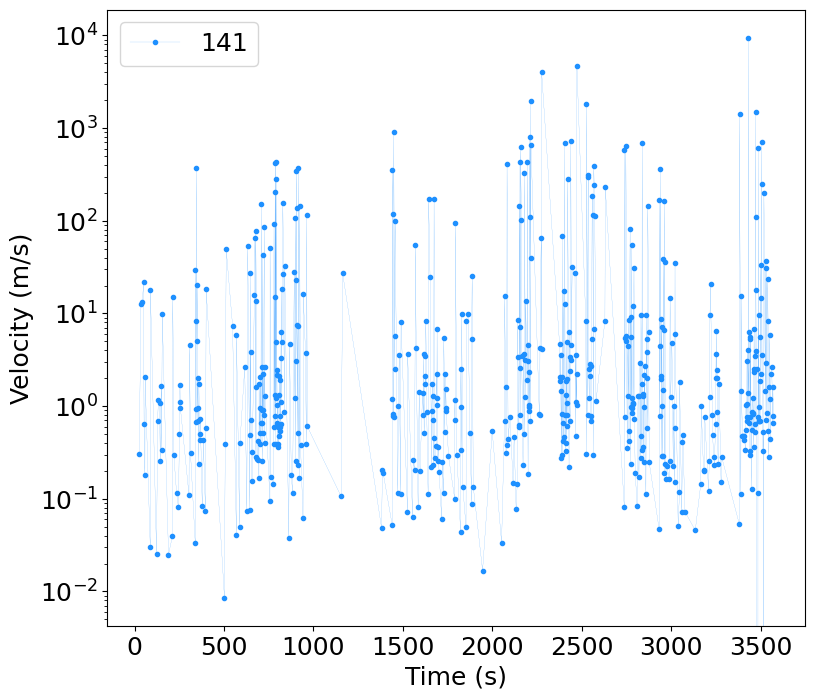

In [35]:
# data = df188.copy()
datas = [df141
         , df188
         , df197
         , df211]
day = ['141'
       , '188'
       , '197'
       , '211']
colors = ['dodgerblue'
          , 'darkorange'
          , 'purple'
          , 'limegreen']
fig, ax = plt.subplots(figsize=(9, 8))

c = 0
dzs = []
for data in datas:
    
    z = data.depth.values
    t = pd.to_datetime(data.origin_time.values)
    
    zmax = z[0]
    tmax = t[0]
    
    v_inst = []
    t_inst = []
    d_inst = []
    dz_inst = []

    n = 0
    for i in np.arange(1, z.shape[0], 1):
        if z[i] > zmax:
            dz = z[i] - zmax
            dt = (t[i] - tmax).total_seconds()
            # vi = (z[i] - zmax)/(t[i] - tmax).total_seconds()
            vi = dz/dt
            v_inst.append(vi)
            # t_inst.append(t[i])
            t_inst.append(dt)
            d_inst.append(z[i])
            dz_inst.append(dz)
            zmax = z[i]
            tmax = t[i]
        else:
            dz_inst.append(z[i] - zmax)
            zmax = z[i]
            n+=1
    print(f'events dropped for day {day[c]}: {n}')
    dzs.append(dz_inst)

    # ax.scatter(v_inst, d_inst, color=colors[c], label=day[c], marker='.')
    ax.plot(np.cumsum(t_inst), v_inst, color=colors[c], label=day[c], marker='.', linewidth=0.1)
    c += 1
    break
        
# ax.set_ylim(-0.02, 2.0)
ax.set_ylabel('Velocity (m/s)')
ax.set_xlabel('Time (s)')
# ax.set_ylim(-0.01, 0.2)
ax.set_yscale('log')
ax.legend()


(array([ 2.,  7., 11., 10.,  7., 13.,  3.,  7.,  8.,  7.,  5., 10., 10.,
         6., 12.,  4.,  7.,  5.,  3.,  9.,  4.,  5.,  3.,  7.,  5.,  7.,
         5.,  2.,  2.,  6.,  1.,  4.,  7.,  4.,  8.,  4.,  1.,  7.,  6.,
         6.,  4.,  5.,  2.,  3.,  3.,  2.,  3.,  2.,  5.,  3.,  4.,  3.,
         1.,  3.,  2.,  2.,  0.,  2.,  1.,  1.,  3.,  6.,  0.,  3.,  5.,
         1.,  1.,  0.,  0.,  2.,  1.,  3.,  0.,  1.,  0.,  1.,  0.,  0.,
         2.,  2.,  0.,  1.,  0.,  1.,  0.,  5.,  1.,  0.,  0.,  0.,  1.,
         0.,  2.,  1.,  1.,  1.,  0.,  2.,  1.]),
 array([0.        , 0.02020202, 0.04040404, 0.06060606, 0.08080808,
        0.1010101 , 0.12121212, 0.14141414, 0.16161616, 0.18181818,
        0.2020202 , 0.22222222, 0.24242424, 0.26262626, 0.28282828,
        0.3030303 , 0.32323232, 0.34343434, 0.36363636, 0.38383838,
        0.4040404 , 0.42424242, 0.44444444, 0.46464646, 0.48484848,
        0.50505051, 0.52525253, 0.54545455, 0.56565657, 0.58585859,
        0.60606061, 0.62626263,

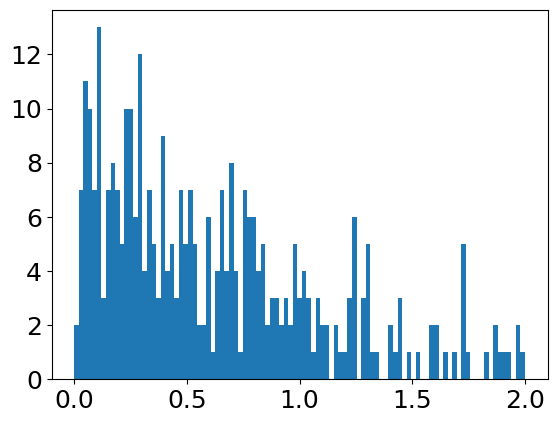

In [36]:
plt.hist(v_inst, bins=np.linspace(0, 2, 100))

In [37]:
df141.shape

(1426, 13)

In [38]:
len(dzs[0])

1425

IndexError: list index out of range

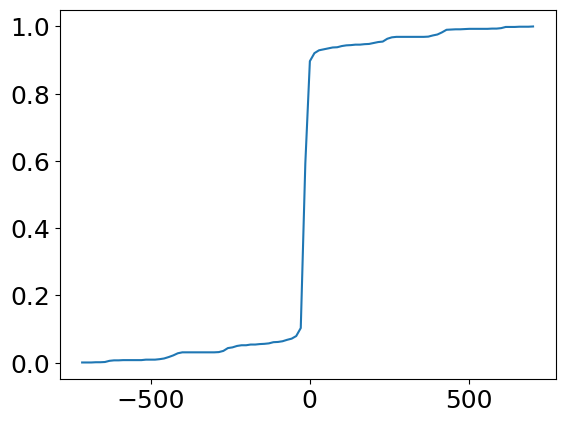

In [39]:
h, e = np.histogram(dzs[0], bins=100)
plt.plot(e[:-1], np.cumsum(h)/np.cumsum(h).max(), label='141')

h, e = np.histogram(dzs[1], bins=100)
plt.plot(e[:-1], np.cumsum(h)/np.cumsum(h).max(), label='188')

h, e = np.histogram(dzs[2], bins=100)
plt.plot(e[:-1], np.cumsum(h)/np.cumsum(h).max(), label='197')

h, e = np.histogram(dzs[3], bins=100)
plt.plot(e[:-1], np.cumsum(h)/np.cumsum(h).max(), label='211')

plt.legend()
plt.xlabel('z[i] - zmax')

In [ ]:
h, e = np.histogram(dzs[0], bins=10000)
plt.plot(e[:-1], np.cumsum(h)/np.cumsum(h).max(), label='141')

h, e = np.histogram(dzs[1], bins=10000)
plt.plot(e[:-1], np.cumsum(h)/np.cumsum(h).max(), label='188')

h, e = np.histogram(dzs[2], bins=10000)
plt.plot(e[:-1], np.cumsum(h)/np.cumsum(h).max(), label='197')

h, e = np.histogram(dzs[3], bins=10000)
plt.plot(e[:-1], np.cumsum(h)/np.cumsum(h).max(), label='211')

plt.legend()
plt.xlabel('z[i] - zmax')
plt.xlim(-1, 1)

In [ ]:
# data = df188.copy()
datas = [df141
         , df188
         , df197
         , df211]
day = ['141'
       , '188'
       , '197'
       , '211']
colors = ['dodgerblue'
          , 'darkorange'
          , 'purple'
          , 'limegreen']

fig, ax = plt.subplots(figsize=(9, 8))

c = 0
dzs = []
for data in datas:
    
    z = data.depth.values
    t = pd.to_datetime(data.origin_time.values)
    
    zmax = z[0]
    tmax = t[0]
    
    v_inst = []
    t_inst = []
    d_inst = []
    dz_inst = []

    n = 0
    for i in np.arange(1, z.shape[0], 1):
        if z[i] > zmax:
            dz = z[i] - zmax
            dt = (t[i] - tmax).total_seconds()
            vi = np.abs(dz/dt)
    
            v_inst.append(vi)
            t_inst.append(dt)
    
            zmax = z[i]
            tmax = t[i]
        else:
            n+=1
    print(f'events dropped for day {day[c]}: {n} out of {data.shape[0]} events')
    # ax.scatter(v_inst, d_inst, color=colors[c], label=day[c], marker='.')
    ax.plot(np.cumsum(t_inst), v_inst, color=colors[c], label=day[c], marker='.', linewidth=0.1)
    c += 1
        
# ax.set_ylim(-0.02, 2.0)
ax.set_ylabel('Velocity (m/s)')
ax.set_xlabel('Time (s)')
# ax.set_ylim(-0.01, 0.2)
ax.set_yscale('log')
ax.legend()

In [ ]:
# data = df188.copy()
datas = [df141
         , df188
         , df197
         , df211]
day = ['141'
       , '188'
       , '197'
       , '211']
colors = ['dodgerblue'
          , 'darkorange'
          , 'purple'
          , 'limegreen']

fig, ax = plt.subplots(figsize=(9, 8))

c = 0
dzs = []
for data in datas:
    
    z = data.depth.values
    t = pd.to_datetime(data.origin_time.values)
    
    zmax = z[0]
    tmax = t[0]
    
    # v_inst = []
    t_inst = []
    # d_inst = []
    dz_inst = []

    n = 0
    for i in np.arange(1, z.shape[0], 1):
        dz = z[i] - zmax
        zmax = z[i]
        dt = (t[i] - tmax).total_seconds()
        tmax = t[i]
    #     if z[i] > zmax:
    #         dz = z[i] - zmax
    #         dt = (t[i] - tmax).total_seconds()
    #         vi = np.abs(dz/dt)
    
    #         v_inst.append(vi)
        t_inst.append(dt)
        dz_inst.append(dz)
    dzs.append(dz_inst)
    
    #         zmax = z[i]
    #         tmax = t[i]
    #     else:
    #         n+=1
    # print(f'events dropped for day {day[c]}: {n} out of {data.shape[0]} events')
    # ax.scatter(v_inst, d_inst, color=colors[c], label=day[c], marker='.')
    # ax.plot(np.cumsum(t_inst), v_inst, color=colors[c], label=day[c], marker='.', linewidth=0.1)
    ax.scatter(t_inst, dz_inst, color=colors[c], label=day[c], marker='.')
    c += 1
        
ax.set_ylim(-100, 100)
ax.set_ylabel('dz (m)')
ax.set_xlabel('dt (s)')
ax.set_xlim(-0.01, 20)
# ax.set_yscale('log')
ax.legend()

In [ ]:
plt.hist(dzs[2], bins=1000)
# plt.xlim(-5, 5)
''

In [ ]:
# # data = df188.copy()
# datas = [df141, df188, df197, df211]
# day = ['141', '188', '197', '211']
# colors = ['dodgerblue', 'darkorange', 'purple', 'limegreen']
# fig, ax = plt.subplots(figsize=(9, 8))

# c = 0
# for data in datas:
    
#     z = data.depth.values
#     t = pd.to_datetime(data.origin_time.values)
#     a = data.max_amp.values
    
#     zmax = z[0]
#     tmax = t[0]
    
#     v_inst = []
#     t_inst = []
#     d_inst = []
#     a_inst = []
    
#     for i in np.arange(1, z.shape[0], 1):
#         if z[i] > zmax:
#             dz = z[i] - zmax
#             dt = (t[i] - tmax).total_seconds()
#             # vi = (z[i] - zmax)/(t[i] - tmax).total_seconds()
#             vi = dz/dt
#             v_inst.append(vi)
#             # t_inst.append(t[i])
#             t_inst.append(dt)
#             d_inst.append(z[i])
#             a_inst.append(a[i])
#             zmax = z[i]
#             tmax = t[i]


#     ax.scatter(v_inst, d_inst, color=colors[c], label=day[c], marker='.')
#     # ax.scatter(t_inst, v_inst, color=colors[c], label=day[c], marker='.')
#     c += 1
#     # break
        
# # ax.set_ylim(-0.01, 0.2)
# # ax.set_ylabel('Velocity (cm/s)')
# # ax.set_xlabel('Amplitude (Pa)')
# # ax.set_xlim(-0.01, 50)
# ax.legend()

In [ ]:
(t[i] - tmax).total_seconds()

In [ ]:

swarm1 = df141[['depth', 'origin_time']].copy()
swarm1['swarm_number'] = 1

swarm2 = df188[['depth', 'origin_time']].copy()
swarm2['swarm_number'] = 2

swarm3 = df197[['depth', 'origin_time']].copy()
swarm3['swarm_number'] = 3

swarm4 = df211[['depth', 'origin_time']].copy()
swarm4['swarm_number'] = 4



pd.concat([swarm1
           ,swarm2
           ,swarm3
           ,swarm4
          ]).to_csv('depths_origintimes_all_swarms.csv', index=False)